# Energy vs. Pressure

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.integrate import quad

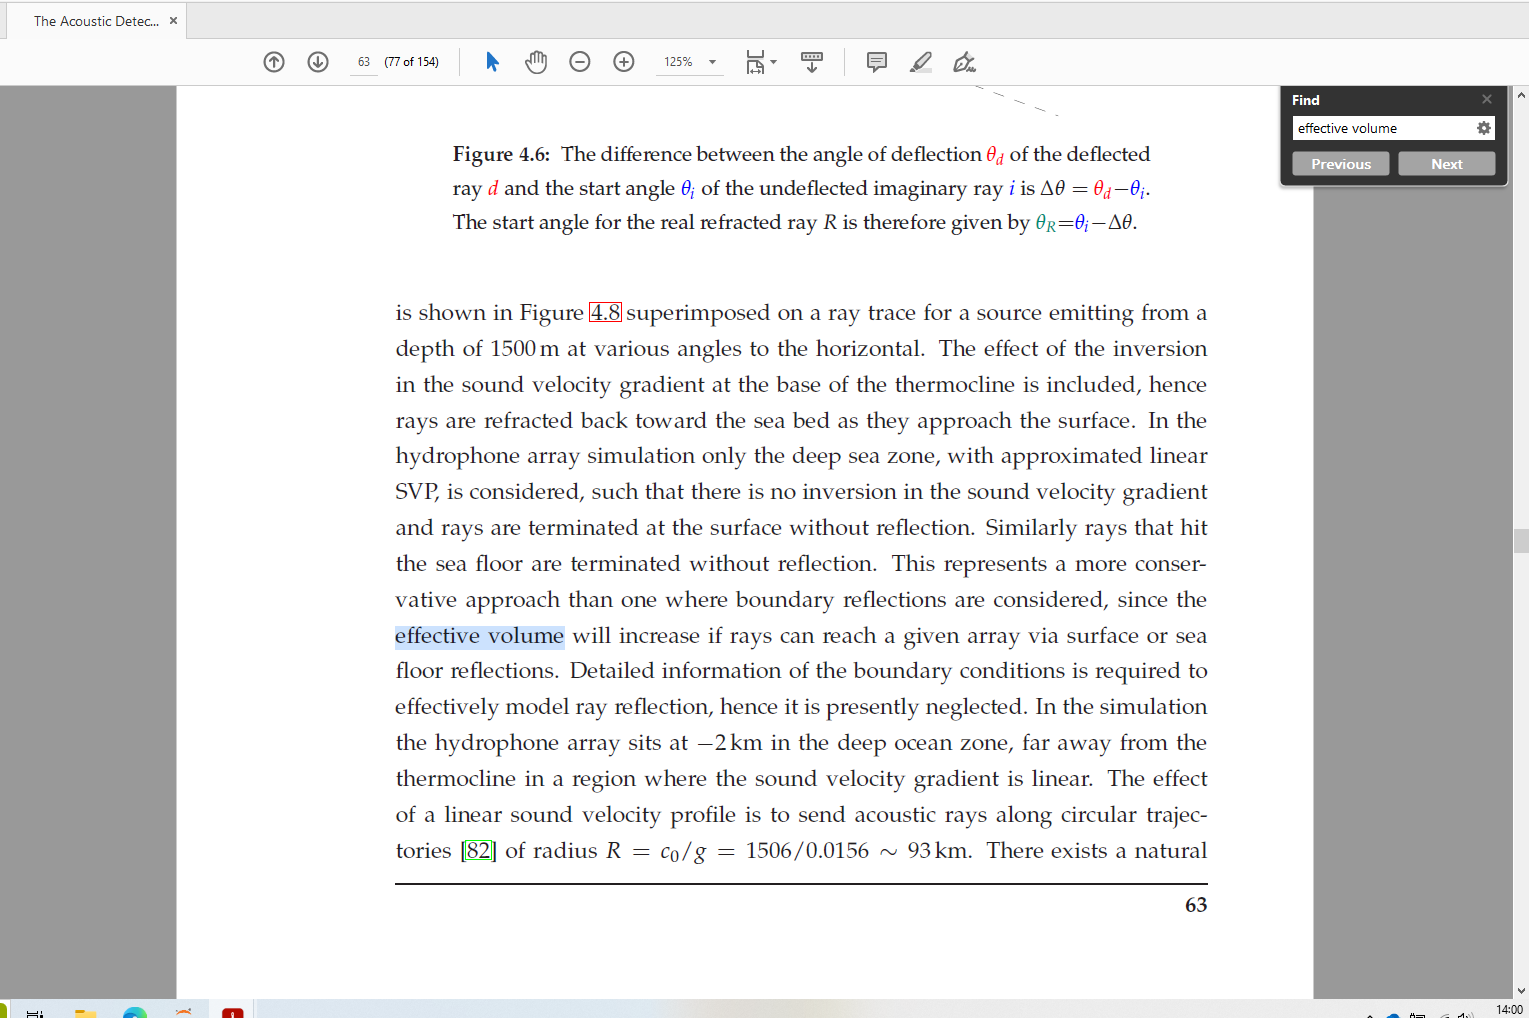

* https://riunet.upv.es/bitstream/handle/10251/85981/Salda%C3%B1a%20-%20Acoustic%20System%20Development%20for%20Neutrino%20Underwater%20Detectors.pdf?sequence=1 (relation 1/r)
* https://indico.cern.ch/event/667036/timetable/?view=standard_numbered_inline_minutes (formula amplitude vs energy)
* Karg praat ook over de 1/r en 1/root(r)

In [26]:
log_energy = np.linspace(9, 17, 100)
neutrino_energy = [10**i for i in log_energy]

# Where is the below relation from???
def relation(neutrino_energy):
    pressure = 2.12 * 10**(-11) * neutrino_energy
    pressure_mPa = pressure * 1000
    return pressure_mPa

In [27]:
plot_pressure = []

for i in range(0, len(neutrino_energy)):
    energy = neutrino_energy[i]
    plot_pressure.append(relation(energy))

In [28]:
# The below formula is for shower energy, not the incoming neutrino (the pressure is at 200 meters)

In [29]:
log_energy = np.linspace(9, 16, 100)
cascade_energy = [10**i * 10**(9) for i in log_energy]

# 0.25 x 21.15 × 10−21 Pa eV−1 is used by Perkin = 0.25 x 21.15 × 10−18 x E_v mPa for neutrino, which is 21.15 × 10−18 x E_cascade mPa
# https://indico.cern.ch/event/667036/timetable/?view=standard_numbered_inline_minutes
def relation_Lahman(cascade_energy):
    pressure_mPa = 10 * 10**(-18) * cascade_energy
    return pressure_mPa

def relation_Perkin(cascade_energy):
    pressure_mPa = 21.15 * 10**(-18) * cascade_energy
    return pressure_mPa

# Take DN/DE is proportional to E^-1, such that N is proportional to ln(E)
def relation_Perkin_number(cascade_energy):
    N = 1 / cascade_energy
    return N

In [30]:
plot_events = []

for i in range(0, len(cascade_energy)):
    energy = cascade_energy[i]
    plot_events.append(relation_Perkin_number(energy))

In [31]:
plot_pressure = []

for i in range(0, len(cascade_energy)):
    energy = cascade_energy[i]
    plot_pressure.append(relation_Perkin(energy))

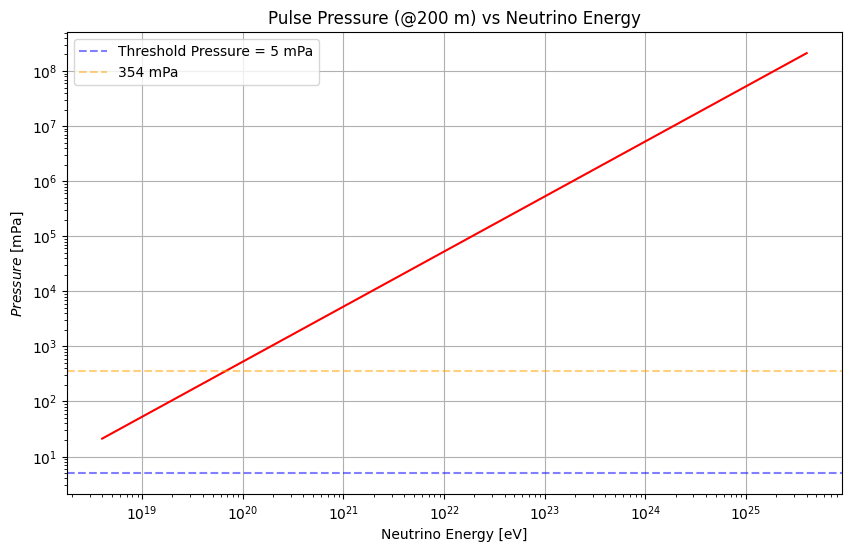

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


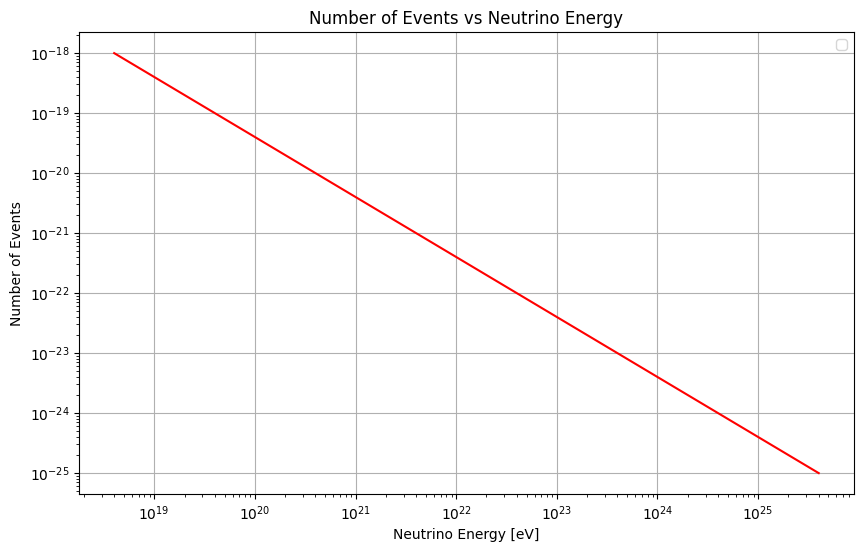

In [32]:
neutrino_energy = [4 * i for i in cascade_energy]

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, plot_pressure, color="red", linestyle="solid")

plt.title('Pulse Pressure (@200 m) vs Neutrino Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('$Pressure$ [mPa]')

plt.axhline(5, color="blue", alpha=0.5, linestyle='dashed', label="Threshold Pressure = 5 mPa")


# check Clara's paper and take line at 200 meter which equates to 354 (10^2.55) mPa and plot this in the graph
plt.axhline(354, color="orange", alpha=0.5, linestyle='dashed', label="354 mPa")
# plot the energy that matches with this pressure at 200 m
#plt.axvline(4 * 10**(19.5), color="orange", alpha=0.5, linestyle='dashdot', label="$4 * 10^{19.5}$ eV")


plt.grid(True)
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, plot_events, color="red", linestyle="solid")

plt.title('Number of Events vs Neutrino Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('Number of Events')


plt.grid(True)
plt.legend()
plt.show()

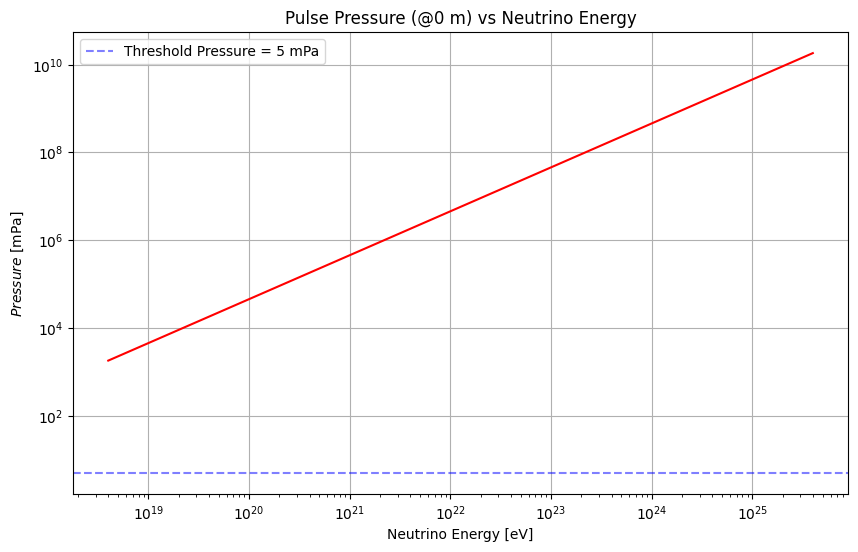

In [33]:
# Assume that in the near field the signal decreases with 1/r and calculate the original signal
r = 200

# for 0-125 meters the relation is r^1/2, for the 125 to 200 meters the relation is approximated as r
# Karg says the relation goes to 1/r at around 100 m distance. The other distances are 0-15m and 15-100m.
original_pressure = [(((125)**(1/2) + 75) * i) for i in plot_pressure]

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, original_pressure, color="red", linestyle="solid")

plt.title('Pulse Pressure (@0 m) vs Neutrino Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('$Pressure$ [mPa]')

plt.axhline(5, color="blue", alpha=0.5, linestyle='dashed', label="Threshold Pressure = 5 mPa")

plt.grid(True)
plt.legend()
plt.show()

### Distance

In [34]:
# Calculate what amplitude of the signal is necessary for it to travel further than 125 meters
necessary_amplitude = (125)**(1/2) * 5

print(necessary_amplitude)

55.90169943749474


In [35]:
# We know that the amplitude diminishes with 1/r^2 (Kevin and Clara) and the threshold is 5 mPa
threshold = 5

# Make a list in which the distance till threshold is stored for each energy value
max_distance = []
max_distance1 = []

for i in range(0, len(original_pressure)):
    pressure = original_pressure[i]
    
    # Calculate the necessary amplitude for the transition point
    necessary_amplitude = (125) ** (1/2) * threshold

    # Calculate the distance based on the amplitude attenuation relationship
    # The first 125 meters the amplitude diminishes by 1/(r**(1/2))
    if pressure >= necessary_amplitude:
        p_after125 = pressure / (125)**(1/2)
        
        # after 125 meters the amplitude diminishes by 1/r
        r = 125 * (p_after125 / threshold)
    else:
        r = (pressure / threshold)

    max_distance.append(r)

for i in range(0, len(plot_pressure)):
    pressure = original_pressure[i]
    p_la = pressure / 125
    r1 = (pressure / threshold)

    r2 = 125 * (p_la / threshold)           # In this sense r1 and r2 are the same, why this is I am not yet sure!!!
    max_distance1.append(r2)

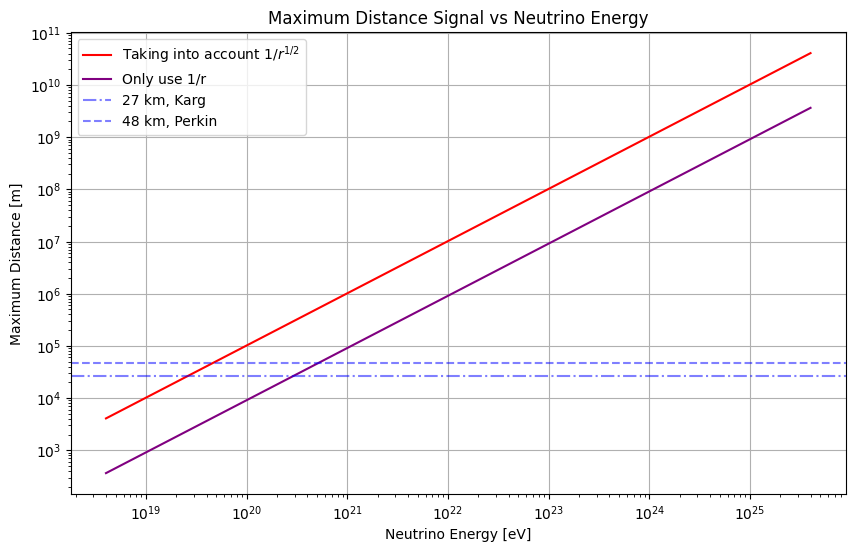

In [36]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, max_distance, color="red", linestyle="solid", label="Taking into account $1/r^{1/2}$")
plt.loglog(neutrino_energy, max_distance1, color="purple", linestyle="solid", label="Only use 1/r")

plt.title('Maximum Distance Signal vs Neutrino Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('Maximum Distance [m]')

# compare the energy from Clara's paper and check if it is indeed 5000 meter where the signal falls below the 5 mPa as read 
# from the graph
#plt.axvline(4 * 10**(19.5), color="orange", alpha=0.5, linestyle='dashdot', label="$4 * 10^{19.5}$ eV")
#plt.axhline(5000, color="orange", alpha=0.5, linestyle='dashed', label="5000 m")

plt.axhline(27000, color="blue", alpha=0.5, linestyle='dashdot', label="27 km, Karg")
plt.axhline(48000, color="blue", alpha=0.5, linestyle='dashed', label="48 km, Perkin")

plt.grid(True)
plt.legend()
plt.show()

# Volume

In [37]:
# Define the volume of the hemisphere around the detector with the radius being the max distance
# Since we are working with a sea floor at a depth of around 4000 (1500) meter, the max radius upwards cannot be more than 4000 m
# The following formula calculate the volume of a dome with the top cut of: V = (1/6) * np.pi * h**2 * (3 * radius - h)
depth = 2500
max_volume = []

for i in range(0, len(max_distance)):
    dis = max_distance[i]
    
    if dis < depth:
        volume = (2/3) * np.pi * dis**3 
        max_volume.append(volume)
        
    else:
        h = dis - depth
        volume = ((2/3) * np.pi * dis**3) - ((1/3) * np.pi * h**2 * (3 * dis - h))
        max_volume.append(volume)

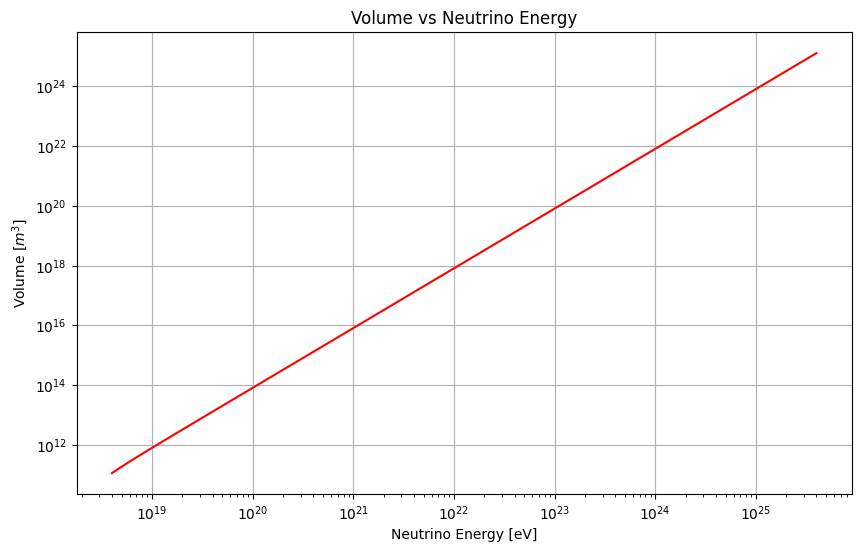

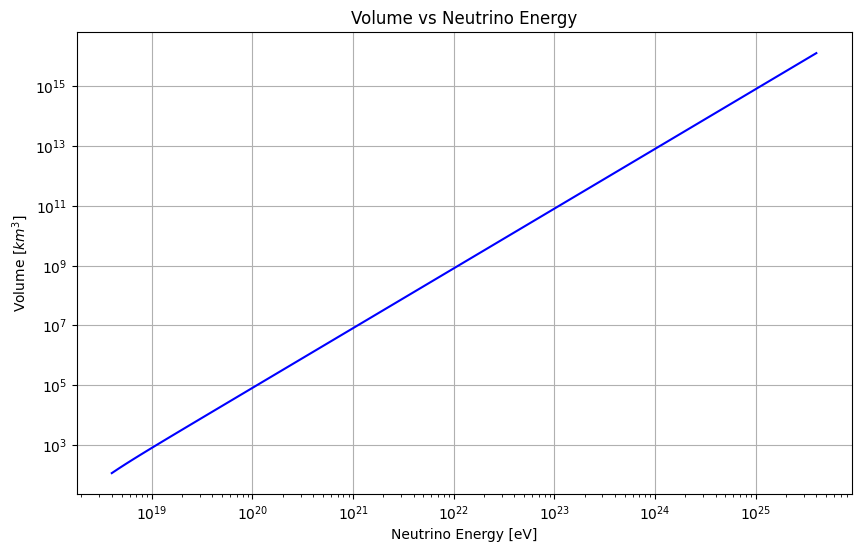

In [38]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, max_volume, color="red", linestyle="solid")

plt.title('Volume vs Neutrino Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('Volume [$m^3$]')

plt.grid(True)
plt.show()

# also in km
max_volume_km = [i / 10**9 for i in max_volume]

plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, max_volume_km, color="blue", linestyle="solid")

plt.title('Volume vs Neutrino Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('Volume [$km^3$]')

plt.grid(True)
plt.show()

# Veff

In [40]:
# Put the energy in GeV
cascade_energy_GeV = [i * 10**(-9) for i in cascade_energy]
neutrino_energy_GeV = [i * 10**(-9) for i in neutrino_energy]

for i in range(0, len(cascade_energy_GeV)):
    a = "{:.3e}".format(cascade_energy_GeV[i])
    #print(a)

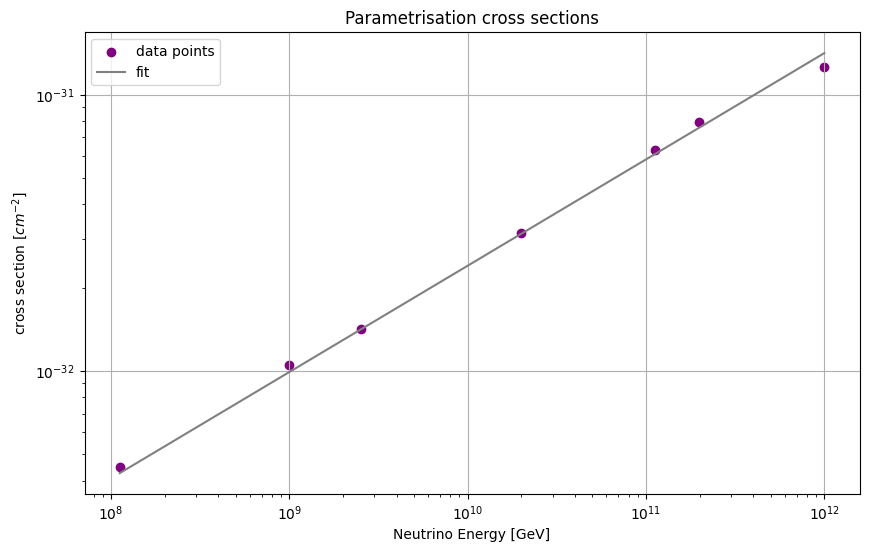

In [41]:
# Read the following numbers from the graph in Appendix A in Perkin
cross = [10**(-32.35), 10**(-31.98), 10**(-31.85), 10**(-31.5), 10**(-31.2), 10**(-31.1), 10**(-30.9)]    # cm^2
E_test2 = [10**(8.05), 10**(9), 10**(9.4), 10**(10.3), 10**(11.05), 10**(11.3), 10**(12)]                 # GeV

# Try to Parametrize the curve (linear)
para = []
for i in range(0, len(E_test2)):
    energy = E_test2[i]
    cross_section = energy**(0.385) / 10**(35.47)
    para.append(cross_section)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(E_test2, cross, color='purple', label='data points')
plt.loglog(E_test2, para, color='grey', label='fit')

plt.title('Parametrisation cross sections')
plt.xlabel('Neutrino Energy [GeV]')
plt.ylabel('cross section [$cm^{-2}$]')

plt.grid(True)
plt.legend()
plt.show()

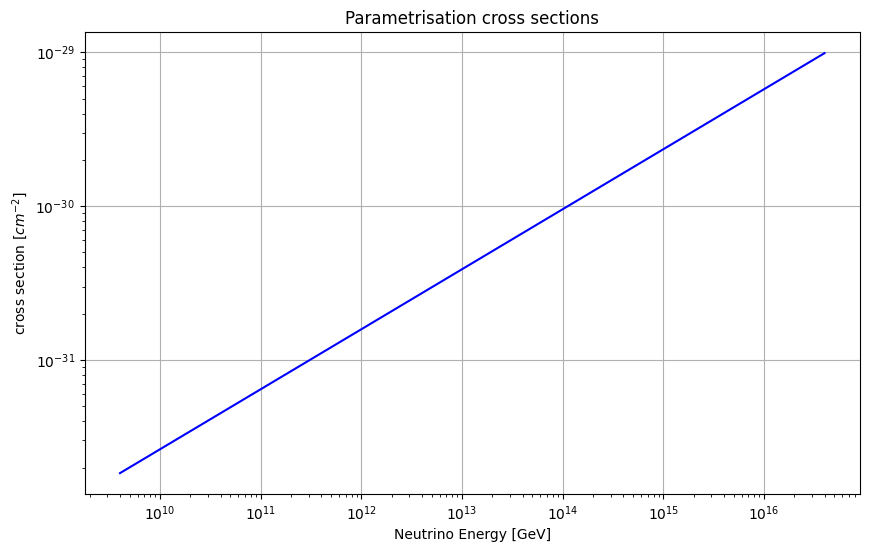

In [42]:
# With the new parametrisation, calculate the cross sections matching the energies wanted
cross = []

# loop through the wanted energies
for i in range(0, len(neutrino_energy_GeV)):
    energy = neutrino_energy_GeV[i]
    cross_section = energy**(0.39) / 10**(35.48)
    cross.append(cross_section)
    
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy_GeV, cross, color='blue')

plt.title('Parametrisation cross sections')
plt.xlabel('Neutrino Energy [GeV]')
plt.ylabel('cross section [$cm^{-2}$]')

plt.grid(True)
plt.show()

In [55]:
# parameters
Sup = 3
N_a = 6.022 * 10**(23)
rho = 1                                                                                   # g cm^-3
T = 365*24*3600                                                                           # s
molar_mass = 18.01528                                                                     # g mol^-1
T5 = 15 * T                                                                                # g mol^-1
mol_constant = 1 / molar_mass                                                             # mol g^-1

# Assume that all the events in this volume will be measured
fraction = 1

# Change the box volume to cm^3
Vbox_i = [i * 10**(15) for i in max_volume_km]                                            # cm^3
print(Vbox_i)
print(energy)

# Fraction from figure 7.2 of Karg's paper
fractions = []

# Calculate the sensitivity for the energies above for 1 year and 5 year
sensitivities = []
sensitivities5 = []

# Calculate the lambda for each box volume and calculate the sensitivities
for i in range(0, len(neutrino_energy_GeV)):
    lam = cross[i] * rho * N_a * Vbox_i[i] * 2 * np.pi * T * fraction * mol_constant      # cm^2 s
    lam5 = cross[i] * rho * N_a * Vbox_i[i] * 2 * np.pi * T5 * fraction * mol_constant    # cm^2 s
    energy = neutrino_energy_GeV[i]
    
    phi = Sup / (energy * lam)                                                            # GeV^-1 cm^-2 s^-1
    phi5 = Sup / (energy * lam5)                                                          # GeV^-1 cm^-2 s^-1

    phi_E22 = energy**2 * phi                                                             # GeV^1 cm^-2 s^-1
    phi_E225 = energy**2 * phi5                                                           # GeV^1 cm^-2 s^-1

    a = "{:.3e}".format(phi_E22)
    sensitivities.append(phi_E22)
    sensitivities5.append(phi_E225)

[1.141034441926861e+17, 1.6431799331674963e+17, 2.3385943804435328e+17, 3.3016643709465216e+17, 4.6354068754925024e+17, 6.482488692986991e+17, 9.040487128884545e+17, 1.2583024300805924e+18, 1.7489035750356024e+18, 2.4283304144740275e+18, 3.3692593847715195e+18, 4.672339092186184e+18, 6.476956419824609e+18, 8.976146362452358e+18, 1.2437240453522186e+19, 1.7230462490356687e+19, 2.38685303642335e+19, 3.3061500095152935e+19, 4.579271858813975e+19, 6.342400957031449e+19, 8.784134416160799e+19, 1.2165657806285549e+20, 1.6848683463819e+20, 2.33341418738246e+20, 3.23157648380828e+20, 4.47542920742832e+20, 6.19802389239096e+20, 8.58362179503104e+20, 1.1887403818022879e+21, 1.6462766515720642e+21, 2.279912395994752e+21, 3.157425902873344e+21, 4.3726823992637443e+21, 6.055674558862848e+21, 8.386427463854592e+21, 1.1614255397064193e+22, 1.6084430310969344e+22, 2.227511462698394e+22, 3.0848508965834753e+22, 4.272168594230477e+22, 5.916468692214579e+22, 8.193637488395059e+22, 1.1347257519590604e+23,

In [44]:
# Read of values for the graph 5.18
E_Perkin = [10**(11.35), 10**(11.75), 10**(11.9), 10**(12.2), 10**(12.4), 10**(12.6), 10**(12.9), 10**(13.2), 10**(13.45), 10**(13.95), 10**(15), 10**(15.85)]
Phi_Perkin = [10**(-5.45), 10**(-5.85), 10**(-6), 10**(-6.2), 10**(-6.3), 10**(-6.4), 10**(-6.35), 10**(-6.2), 10**(-6.1), 10**(-5.8), 10**(-5.1), 10**(-4.5)]

Phi_Perkin5 = [10**(-8.5), 10**(-8.7), 10**(-8.6), 10**(-8.5), 10**(-8.3), 10**(-8), 10**(-7.7), 10**(-7.4), 10**(-7.2), 10**(-6.8), 10**(-6.5), 10**(-6.2)]
E_Perkin5 = [10**(10.5), 10**(11), 10**(11.5), 10**(12), 10**(12.5), 10**(13), 10**(13.5), 10**(14), 10**(14.5), 10**(15), 10**(15.5), 10**(16)]

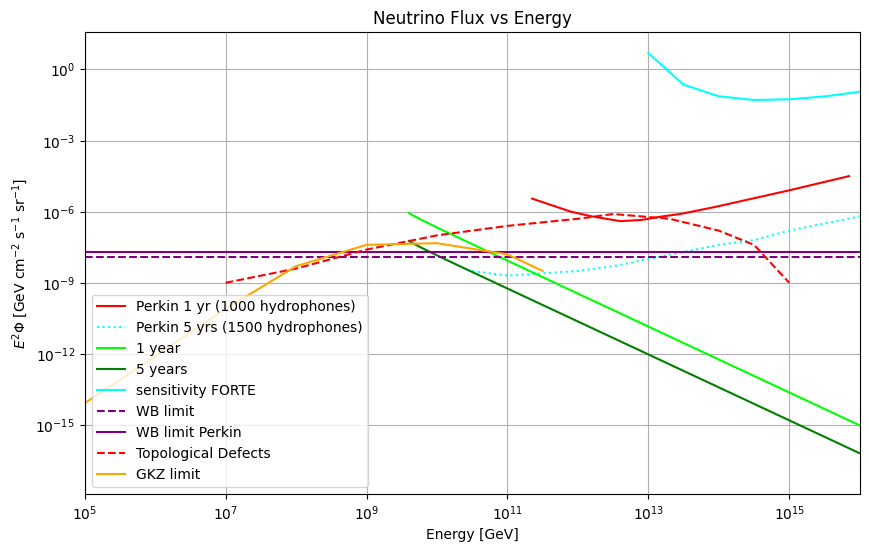

In [56]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_Perkin, Phi_Perkin, color="red", label="Perkin 1 yr (1000 hydrophones)")
plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Perkin 5 yrs (1500 hydrophones)")

plt.loglog(neutrino_energy_GeV, sensitivities, color="lime", label="1 year")
plt.loglog(neutrino_energy_GeV, sensitivities5, color="green", label="5 years")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple", linestyle='dashed')
plt.axhline(10**(-7.7), label="WB limit Perkin", color="purple")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', linestyle='dashed', color='red')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
#plt.ylim(10**(-9), 10**(1))
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Now we will take into account refraction, so a maximum can volume

### 27 km

In [21]:
# Make a list in which the distance till threshold is stored for each energy value
max_distance_refraction = []
        
for i in range(0, len(original_pressure)):
    pressure = original_pressure[i]
    
    # Calculate the necessary amplitude for the transition point
    necessary_amplitude = (125) ** (1/2) * threshold

    # Calculate the distance based on the amplitude attenuation relationship
    if pressure >= necessary_amplitude:
        p_after125 = pressure / (125)**(1/2)
        r = 125 * (p_after125 / threshold)
    else:
        r = (pressure / threshold) ** 2
    
    if r < 27000:
        max_distance_refraction.append(r)
        
    else: 
        max_distance_refraction.append(27000)

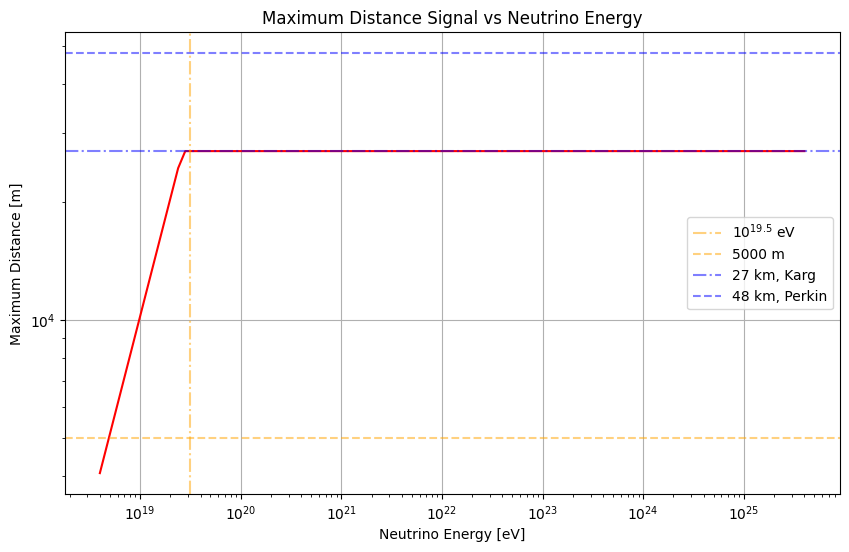

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(neutrino_energy, max_distance_refraction, color="red", linestyle="solid")

plt.title('Maximum Distance Signal vs Neutrino Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('Maximum Distance [m]')

# compare the energy from Clara's paper and check if it is indeed 5000 meter where the signal falls below the 5 mPa as read 
# from the graph
plt.axvline(10**(19.5), color="orange", alpha=0.5, linestyle='dashdot', label="$10^{19.5}$ eV")
plt.axhline(5000, color="orange", alpha=0.5, linestyle='dashed', label="5000 m")

plt.axhline(27000, color="blue", alpha=0.5, linestyle='dashdot', label="27 km, Karg")
plt.axhline(48000, color="blue", alpha=0.5, linestyle='dashed', label="48 km, Perkin")

plt.grid(True)
plt.legend()
plt.show()

In [23]:
# Define the volume of the hemisphere around the detector with the radius being the max distance
# Since we are working with a sea floor at a depth of around 4000 (1500) meter, the max radius upwards cannot be more than 4000 m
# The following formula calculate the volume of a dome with the top cut of: V = (1/6) * np.pi * h**2 * (3 * radius - h)
depth = 2500
max_volume_refraction = []

for i in range(0, len(max_distance_refraction)):
    dis = max_distance_refraction[i]
    
    if dis < depth:
        volume = (2/3) * np.pi * dis**3 
        max_volume_refraction.append(volume)
        
    else:
        h = dis - depth
        volume = ((2/3) * np.pi * dis**3) - ((1/3) * np.pi * h**2 * (3 * dis - h))
        max_volume_refraction.append(volume)

In [24]:
# Change the box volume to cm^3
Vbox_i_refraction = [i * 10**(15) / 10**9 for i in max_volume_refraction]                                            # cm^3

# Calculate the sensitivity for the energies above
sensitivities_refraction = []
sensitivities_refraction5 = []

# Calculate the lambda for each box volume and calculate the sensitivities
for i in range(0, len(neutrino_energy_GeV)):   
    lam = cross[i] * rho * N_a * Vbox_i_refraction[i] * 2 * np.pi * T * fraction * mol_constant      # cm^2 s
    lam5 = cross[i] * rho * N_a * Vbox_i_refraction[i] * 2 * np.pi * T5 * fraction * mol_constant    # cm^2 s
    energy = neutrino_energy_GeV[i]
    
    phi = Sup / (energy * lam)                                                            # GeV^-1 cm^-2 s^-1
    phi5 = Sup / (energy * lam5)                                                          # GeV^-1 cm^-2 s^-1

    phi_E22 = energy**2 * phi                                                             # GeV^1 cm^-2 s^-1
    phi_E225 = energy**2 * phi5                                                           # GeV^1 cm^-2 s^-1

    a = "{:.3e}".format(phi_E22)
    sensitivities_refraction.append(phi_E22)
    sensitivities_refraction5.append(phi_E225)

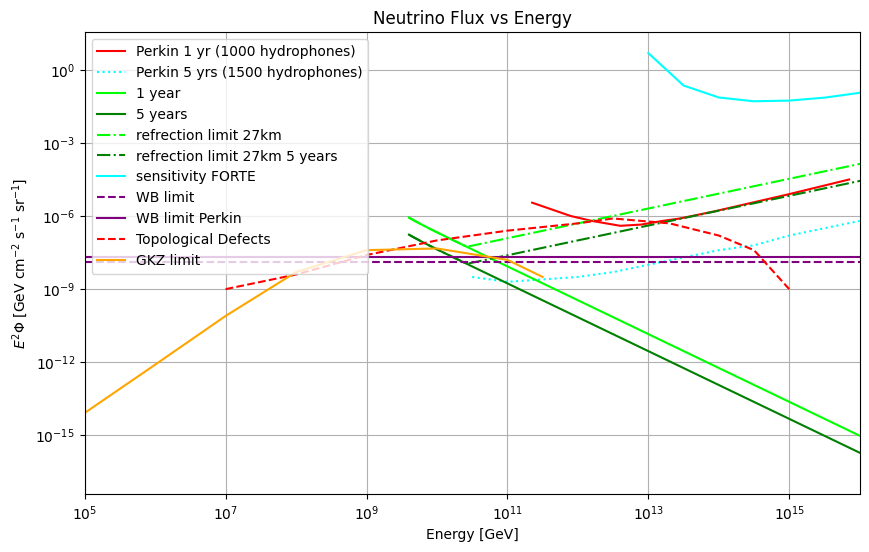

In [25]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_Perkin, Phi_Perkin, color="red", label="Perkin 1 yr (1000 hydrophones)")
plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Perkin 5 yrs (1500 hydrophones)")

plt.loglog(neutrino_energy_GeV, sensitivities, color="lime", label="1 year")
plt.loglog(neutrino_energy_GeV, sensitivities5, color="green", label="5 years")
plt.loglog(neutrino_energy_GeV, sensitivities_refraction, color="lime", linestyle='dashdot', label="refrection limit 27km")
plt.loglog(neutrino_energy_GeV, sensitivities_refraction5, color="green", linestyle='dashdot', label="refrection limit 27km 5 years")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple", linestyle='dashed')
plt.axhline(10**(-7.7), label="WB limit Perkin", color="purple")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', linestyle='dashed', color='red')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
#plt.ylim(10**(-9), 10**(1))
plt.legend()
plt.grid(True)
plt.show()

### 48 km

In [26]:
# Make a list in which the distance till threshold is stored for each energy value
max_distance_refraction48 = []

for i in range(0, len(original_pressure)):
    pressure = original_pressure[i]
    
    # Calculate the necessary amplitude for the transition point
    necessary_amplitude = (125) ** (1/2) * threshold

    # Calculate the distance based on the amplitude attenuation relationship
    if pressure >= necessary_amplitude:
        p_after125 = pressure / (125)**(1/2)
        r = 125 * (p_after125 / threshold)
    else:
        r = (pressure / threshold) ** 2
    if r < 48000:
        max_distance_refraction48.append(r)
        
    else: 
        max_distance_refraction48.append(48000)

In [27]:
# Define the volume of the hemisphere around the detector with the radius being the max distance
# Since we are working with a sea floor at a depth of around 4000 (1500) meter, the max radius upwards cannot be more than 4000 m
# The following formula calculate the volume of a dome with the top cut of: V = (1/6) * np.pi * h**2 * (3 * radius - h)
depth = 2500
max_volume_refraction48 = []

for i in range(0, len(max_distance_refraction48)):
    dis = max_distance_refraction48[i]
    
    if dis < depth:
        volume = (2/3) * np.pi * dis**3 
        max_volume_refraction48.append(volume)
        
    else:
        h = dis - depth
        volume = ((2/3) * np.pi * dis**3) - ((1/3) * np.pi * h**2 * (3 * dis - h))
        max_volume_refraction48.append(volume)

In [28]:
# Change the box volume to cm^3
Vbox_i_refraction48 = [i * 10**(15) / 10**9 for i in max_volume_refraction48]                                            # cm^3

# Calculate the sensitivity for the energies above
sensitivities_refraction48 = []
sensitivities_refraction485 = []

# Calculate the lambda for each box volume and calculate the sensitivities
for i in range(0, len(neutrino_energy_GeV)):   
    lam = cross[i] * rho * N_a * Vbox_i_refraction48[i] * 2 * np.pi * T * fraction * mol_constant      # cm^2 s
    lam5 = cross[i] * rho * N_a * Vbox_i_refraction48[i] * 2 * np.pi * T5 * fraction * mol_constant    # cm^2 s
    energy = neutrino_energy_GeV[i]
    
    phi = Sup / (energy * lam)                                                            # GeV^-1 cm^-2 s^-1
    phi5 = Sup / (energy * lam5)                                                          # GeV^-1 cm^-2 s^-1

    phi_E22 = energy**2 * phi                                                             # GeV^1 cm^-2 s^-1
    phi_E225 = energy**2 * phi5                                                           # GeV^1 cm^-2 s^-1

    a = "{:.3e}".format(phi_E22)
    sensitivities_refraction48.append(phi_E22)
    sensitivities_refraction485.append(phi_E225)

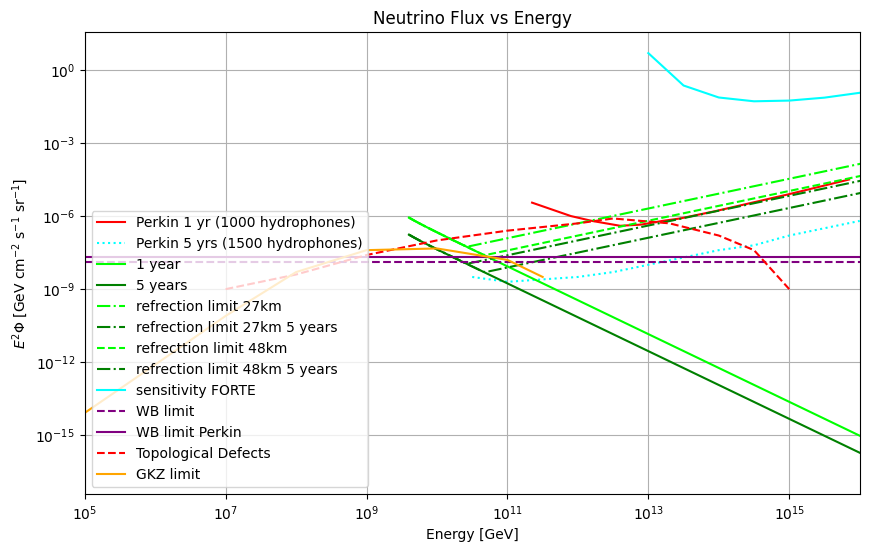

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_Perkin, Phi_Perkin, color="red", label="Perkin 1 yr (1000 hydrophones)")
plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Perkin 5 yrs (1500 hydrophones)")

plt.loglog(neutrino_energy_GeV, sensitivities, color="lime", label="1 year")
plt.loglog(neutrino_energy_GeV, sensitivities5, color="green", label="5 years")
plt.loglog(neutrino_energy_GeV, sensitivities_refraction, color="lime", linestyle='dashdot', label="refrection limit 27km")
plt.loglog(neutrino_energy_GeV, sensitivities_refraction5, color="green", linestyle='dashdot', label="refrection limit 27km 5 years")
plt.loglog(neutrino_energy_GeV, sensitivities_refraction48, color="lime", linestyle='dashed', label="refrecttion limit 48km")
plt.loglog(neutrino_energy_GeV, sensitivities_refraction485, color="green", linestyle='dashdot', label="refrection limit 48km 5 years")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple", linestyle='dashed')
plt.axhline(10**(-7.7), label="WB limit Perkin", color="purple")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', linestyle='dashed', color='red')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
#plt.ylim(10**(-9), 10**(1))
plt.legend(loc='lower left')
plt.grid(True)
plt.show()